# Analysis and interactive visualization of SDM design parameters

In [1]:
import numpy as np
import pandas as pd
import cbadc as cb
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from itertools import product
from numpy.linalg import LinAlgError

## Brute-force search and storing results

In [2]:
# target specifications:
target_SNR = 90
Bw = 20e3

In [3]:
# parameter search space:
orders = [2, 3, 4, 5] # modulator order
osr_values = [32, 64, 128, 256] # oversampling ratio
nlev_values = [2, 3] # number of DAC levels
Hinf_values = [1.0, 1.5, 2.0] # feedback gain
forms = ["CRFB", "CRFF", "CIFB", "CIFF", "CRFBD", "CRFFD"] # modulator architectures
tdac = [0, 1] # DAC sampling times

In [4]:
# store resutls:
results = []

In [5]:
# brute-force search:
for order, osr, nlev, Hinf, form in product(orders, osr_values, nlev_values, Hinf_values, forms):
    # compute the sampling frequency:
    fs = Bw * osr * 2
    print(f"Sampling frequency: {fs / 1e6} MHz")
    
    print("###################################")
    print(f"Testing: order={order}, osr={osr}, nlev={nlev}, Hinf={Hinf}, form={form}")
    print("###################################")
    
    # synthesize the Noise Transfer Function (NTF):
    ntf = cb.delsig.synthesizeNTF(order, osr, 2, Hinf, 0.0)
    
    # realize the NTF in state-space representation:
    a, g, b, c = cb.delsig.realizeNTF(ntf, form)
    ABCD = cb.delsig.stuffABCD(a, g, b, c)
    
    
    # create discrete-time analog frontend model:
    dt_analog_frontend = cb.AnalogFrontend.dtsdm(ABCD, nlev)
    
    try:
        # run an SNR simulation:
        snr, amp, _ = dt_analog_frontend.simulateSNR(osr)
        max_snr = max(snr)

        # store result:
        results.append({"Order": order, "OSR": osr, "Levels": nlev, "Hinf": Hinf, "Form": form, "SNR": max_snr})
    
    except (LinAlgError, ValueError) as e:
        print(f"Error encountered with order={order}, osr={osr}, nlev={nlev}, Hinf={Hinf}, form={form}. Skipping this configuration")

INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=1.0, form=CRFB
###################################


C:\Users\frang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cbadc\digital_backend.py:238: RuntimeWarning: overflow encountered in matmul
  m_v[i + 1] = self._Af @ m_v[i] + self._Bf @ s[i]
C:\Users\frang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cbadc\digital_backend.py:238: RuntimeWarning: invalid value encountered in matmul
  m_v[i + 1] = self._Af @ m_v[i] + self._Bf @ s[i]
C:\Users\frang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cbadc\digital_backend.py:242: RuntimeWarning: invalid value encountered in matmul
  u_hat[i] = self._W @ (m_v[i + 1] - m_v[i])
INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=1.0, form=CIFB
###################################


C:\Users\frang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cbadc\analog_frontend.py:1482: RuntimeWarning: invalid value encountered in multiply
  np.fft.fft(u_hat[warm_up:] * window[:, np.newaxis], axis=0), axes=0
C:\Users\frang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\fft\_pocketfft.py:94: RuntimeWarning: invalid value encountered in fft
  return ufunc(a, fct, axes=[(axis,), (), (axis,)], out=out)
INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=2, osr=32, nlev=3, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=2, osr=64, nlev=3, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=2, osr=128, nlev=3, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=2, osr=256, nlev=3, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=1.0, form=CRFF
###################################


C:\Users\frang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deltasigma\_realizeNTF.py:183: UserWarning: The ntf's zeros have had their real parts set to one.
  warn("The ntf's zeros have had their real parts set to one.")
INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=1.0, form=CIFB
###################################


C:\Users\frang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deltasigma\_realizeNTF.py:205: UserWarning: The ntf's zeros have had their real parts set to one.
  warn("The ntf's zeros have had their real parts set to one.")
INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=3, osr=32, nlev=3, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=3, osr=64, nlev=3, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=3, osr=128, nlev=3, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=3, osr=256, nlev=3, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=4, osr=32, nlev=3, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=4, osr=64, nlev=3, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=4, osr=128, nlev=2, Hinf=1.0, form=CRFB. Skipping this configuration
Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=4, osr=128, nlev=2, Hinf=1.0, form=CIFB. Skipping this configuration
Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=4, osr=128, nlev=3, Hinf=1.0, form=CRFB. Skipping this configuration
Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=4, osr=128, nlev=3, Hinf=1.0, form=CIFB. Skipping this configuration
Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=4, osr=128, nlev=3, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=4, osr=256, nlev=2, Hinf=1.0, form=CIFB. Skipping this configuration
Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=4, osr=256, nlev=3, Hinf=1.0, form=CIFB. Skipping this configuration
Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=4, osr=256, nlev=3, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=32, nlev=2, Hinf=1.0, form=CRFB. Skipping this configuration
Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=32, nlev=2, Hinf=1.0, form=CIFB. Skipping this configuration
Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=32, nlev=2, Hinf=1.0, form=CRFBD. Skipping this configuration
Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=32, nlev=3, Hinf=1.0, form=CRFB. Skipping this configuration
Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=32, nlev=3, Hinf=1.0, form=CIFB. Skipping this configuration
Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=32, nlev=3, Hinf=1.0, form=CRFBD. Skipping this configuration
Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 1.28 MHz
###################################
Testing: order=5, osr=32, nlev=3, Hinf=2.0, form=CRFFD
###################################


C:\Users\frang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deltasigma\_synthesizeNTF1.py:144: UserWarning: Danger! Iteration limit exceeded.
  warn('Danger! Iteration limit exceeded.')
INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 2.56 MHz
###################################
Testing: order=5, osr=64, nlev=3, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=128, nlev=2, Hinf=1.0, form=CRFB. Skipping this configuration
Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=128, nlev=2, Hinf=1.0, form=CIFB. Skipping this configuration
Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=128, nlev=2, Hinf=1.0, form=CRFBD. Skipping this configuration
Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=128, nlev=3, Hinf=1.0, form=CRFB. Skipping this configuration
Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=128, nlev=3, Hinf=1.0, form=CIFB. Skipping this configuration
Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=128, nlev=3, Hinf=1.0, form=CRFBD. Skipping this configuration
Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 5.12 MHz
###################################
Testing: order=5, osr=128, nlev=3, Hinf=2.0, form=CRFFD
###################################


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend
INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=256, nlev=2, Hinf=1.0, form=CRFB. Skipping this configuration
Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=256, nlev=2, Hinf=1.0, form=CIFB. Skipping this configuration
Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=1.0, form=CRFBD
###################################


Error encountered with order=5, osr=256, nlev=2, Hinf=1.0, form=CRFBD. Skipping this configuration
Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend
INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=2, Hinf=2.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=1.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=256, nlev=3, Hinf=1.0, form=CRFB. Skipping this configuration
Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=1.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=1.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=256, nlev=3, Hinf=1.0, form=CIFB. Skipping this configuration
Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=1.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=1.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Error encountered with order=5, osr=256, nlev=3, Hinf=1.0, form=CRFBD. Skipping this configuration
Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=1.0, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=1.5, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=1.5, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=1.5, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=1.5, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=1.5, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=1.5, form=CRFFD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=2.0, form=CRFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=2.0, form=CRFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=2.0, form=CIFB
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=2.0, form=CIFF
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=2.0, form=CRFBD
###################################


INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 10.24 MHz
###################################
Testing: order=5, osr=256, nlev=3, Hinf=2.0, form=CRFFD
###################################


In [6]:
# convert to DataFrame:
df_results = pd.DataFrame(results)

# convert to CSV:
df_results.to_csv("sigma_delta_results.csv", index=False)

## Visualizing desing parameters impact on SNR

In [7]:
df = pd.read_csv("sigma_delta_results.csv")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\frang\AppData\Local\Temp\ipykernel_17436\2263489202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Order", y="SNR", data=df, palette="viridis")
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


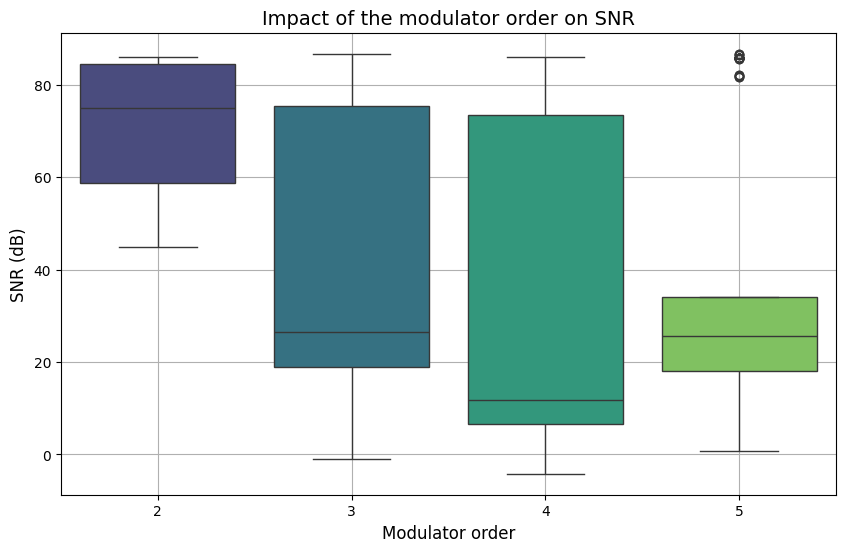

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Order", y="SNR", data=df, palette="viridis")
plt.title("Impact of the modulator order on SNR", fontsize=14)
plt.xlabel("Modulator order", fontsize=12)
plt.ylabel("SNR (dB)", fontsize=12)
plt.grid(True)
plt.show()

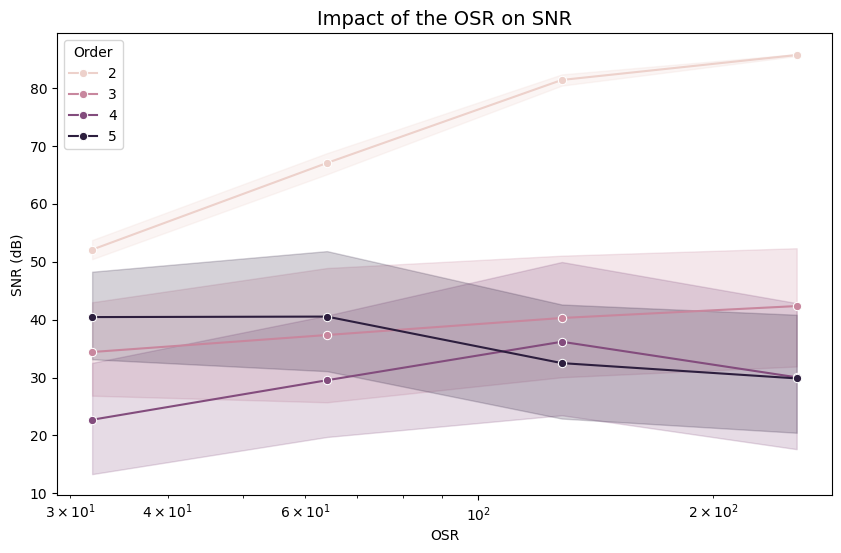

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="OSR", y="SNR", hue="Order", marker="o")
plt.title("Impact of the OSR on SNR", fontsize=14)
plt.xlabel("OSR")
plt.ylabel("SNR (dB)")
plt.legend(title="Order")
plt.xscale("log") # logarithmic scale (better visualization)
plt.show()

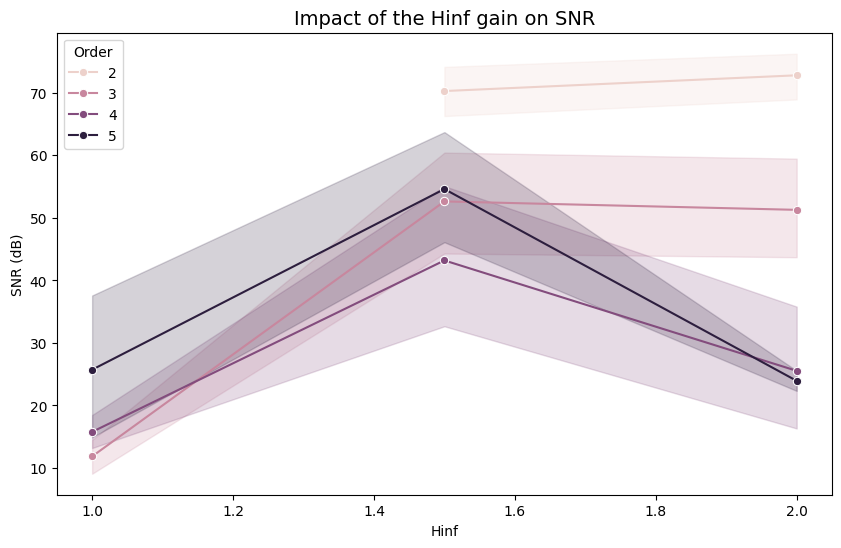

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Hinf", y="SNR", hue="Order", marker="o")
plt.title("Impact of the Hinf gain on SNR", fontsize=14)
plt.xlabel("Hinf")
plt.ylabel("SNR (dB)")
plt.legend(title="Order")
plt.show()

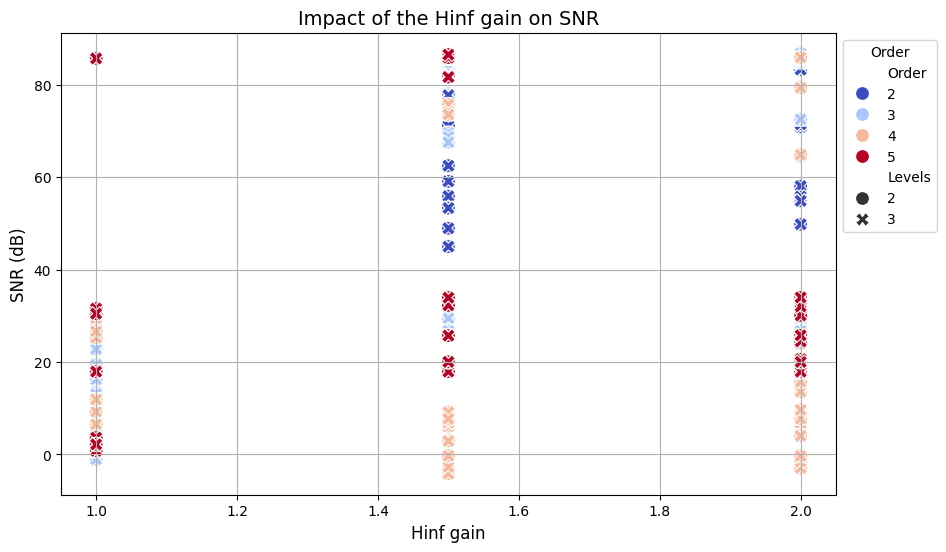

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Hinf", y="SNR", hue="Order", style="Levels", palette="coolwarm", s=100)
plt.title("Impact of the Hinf gain on SNR", fontsize=14)
plt.xlabel("Hinf gain", fontsize=12)
plt.ylabel("SNR (dB)", fontsize=12)
plt.legend(title="Order", bbox_to_anchor=(1, 1), loc="upper left")
plt.grid(True)
plt.show()

In [12]:
# convert cathegoric parameters to number:
df_corr = df.copy()
df_corr["Order"] = df_corr["Order"].astype(float)
df_corr["OSR"] = df_corr["OSR"].astype(float)
df_corr["Levels"] = df_corr["Levels"].astype(float)
df_corr["Hinf"] = df_corr["Hinf"].astype(float)

# correlation matrix:
corr_matrix = df_corr.corr()

# heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between parameters and SNR", fontsize=14)
plt.show()

ValueError: could not convert string to float: 'CRFB'

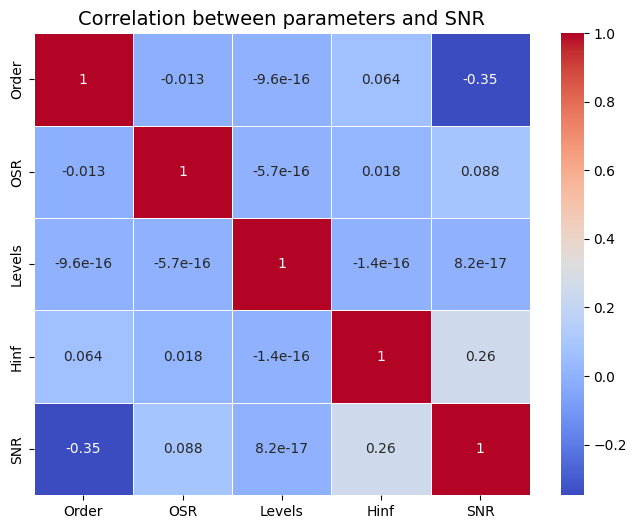

In [13]:
# first solution: not including the modulator architecture

# select only number columns:
df_corr_numeric = df.select_dtypes(include=["number"])

# correlation matrix:
corr_matrix = df_corr_numeric.corr()

# heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between parameters and SNR", fontsize=14)
plt.show()

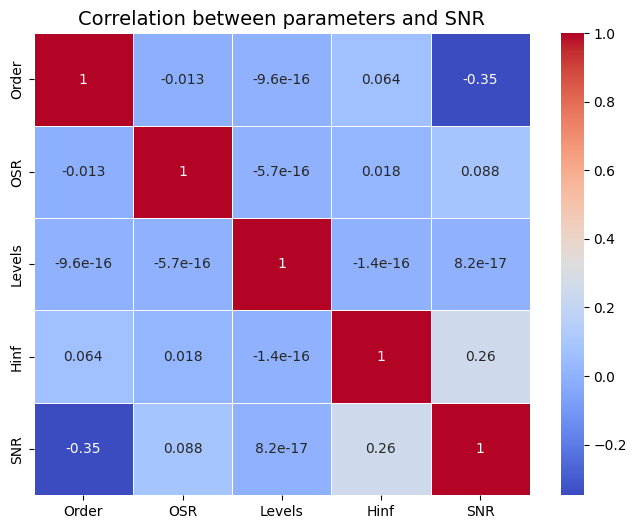

In [14]:
# second solution: codify cathegorical values

# codifying the modulator architecture:
df_corr["Form"] = df_corr["Form"].astype("category").cat.codes

# select only number columns:
df_corr_numeric = df.select_dtypes(include=["number"])

# correlation matrix:
corr_matrix = df_corr_numeric.corr()

# heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between parameters and SNR", fontsize=14)
plt.show()

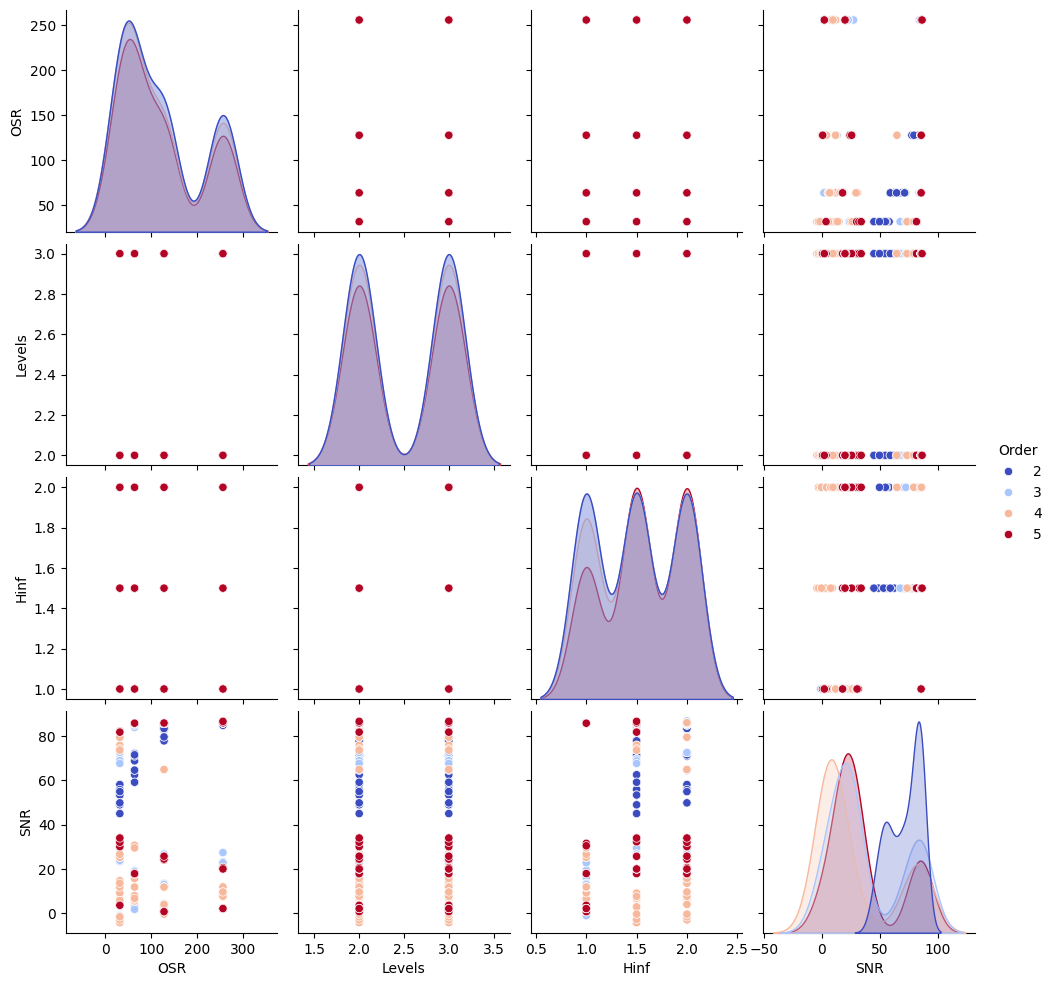

In [15]:
sns.pairplot(df, hue="Order", palette="coolwarm")
plt.show()

## Creating an interactive interface with Streamlit

See **streamlit_app.py**.

In [16]:
# run in a terminal:
# streamlit run streamlit_app.py